to mimic the printing banding artifacts, which are caused by the mechanical and electrical components in printers,
we can add a sinusoidal variation across the image intensity perpendicular to the process direction
The direction in which the paper moves through the printer (usually vertical in portrait images).
banding appears as horizontal lines (perpendicular to the vertical process direction), also it is typically periodic in nature

banding(i)=A⋅sin(2π⋅f⋅ i/rows)

In [3]:
import os
print(os.path.abspath("TESTING DOC_CV_page-0001.jpg"))


/home/khushi/TESTING DOC_CV_page-0001.jpg


In [41]:
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt

# image_path = r"home/khushi/Desktop/CV_Printer_Identification/Testing_images/TESTING_CV.jpg"
# img = Image.open(image_path).convert('L')
# img = np.array(img) 

# rows, cols = img.shape
# freq = 10       # number of bands
# amplitude = 0.1 

# """
# See this is used for simulating printer banding artifact which is applied evenly across the image
# """
# y = np.arange(rows).reshape(-1, 1)
# banding = amplitude * np.sin(2 * np.pi * freq * y / rows)

# banded_img = img + banding
# banded_img = np.clip(banded_img, 0, 1)

# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title('Original')
# plt.imshow(img, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('With Banding Artifact')
# plt.imshow(banded_img, cmap='gray')
# plt.axis('off')
# plt.show()


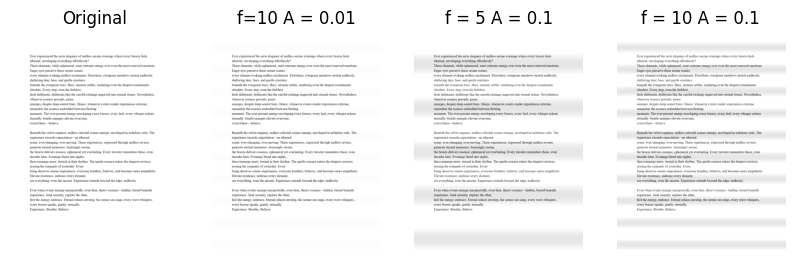

In [45]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_banding(img, f=10, A=0.01):
    
# See this is used for simulating printer banding artifact which is applied evenly across the image
    rows, cols = img.shape
    y = np.arange(rows).reshape(-1, 1)
    banding = A * np.sin(2 * np.pi * f * y / rows)
    
    banded_img = img + banding
    banded_img = np.clip(banded_img, 0, 1)  
    banded_img = (banded_img * 255).astype(np.uint8)  # Convertto 8-bit image
    
    return banded_img

def save_image(array, name):
    img = Image.fromarray(np.clip(array, 0, 255).astype(np.uint8))
    img.save(name + ".jpg")

image_path = r"/home/khushi/Desktop/CV_Printer_Identification/Testing_images/TESTING_CV.jpg"
img = Image.open(image_path).convert('L')
img = np.array(img, dtype=np.float32) 
img = img / 255.0  

banded_img = apply_banding(img, f=10, A=0.01)
banded_img2 = apply_banding(img, f= 5, A = 0.1)
banded_img3 = apply_banding(img, f = 10, A=0.1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('f=10 A = 0.01')
plt.imshow(banded_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('f = 5 A = 0.1')
plt.imshow(banded_img2, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('f = 10 A = 0.1')
plt.imshow(banded_img3, cmap='gray')
plt.axis('off')
plt.show()
# Save the banded image
# save_image(banded_img, "banded_image_10_0.01")
# save_image(banded_img2, "banded_image_10_0.04")
save_image(banded_img2, "banded_image_f5_A0.1")
save_image(banded_img3, "banded_image_f10_A0.1")